In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('iris.csv')

In [3]:
X=data[['sepal length','petal width']]
y=data['iris']
c=[]
for i in list(y):
    if i=='Iris-setosa':
        c=c+[1]
    else:
        c=c+[0]
ynew=pd.DataFrame({'iris':c})
# print(ynew)

In [4]:
def sigmoid(x):
    if type(x) is int or type(x) is float:
        return 1 / (1 +  np.exp(-x))
    elif type(x) is list:
        for i in range(len(x)):
            x[i]=1/(1+np.exp(-x[i]))
        return x
    elif type(x) is np.matrix or type(x) is np.array:
        if type(x) is np.matrix:
            ti=0
        else:
            ti=1
        t=[]
        if x.shape[1]==1:
            for i in range(x.size):
                t=t+[1/(1+np.exp(-x[i,0]))]
            if ti==0:
                return np.matrix(t).T
            else:
                return np.array(t)
        elif x.shape[0]==1:
            for i in range(x.size):
                t=t+[1/(1+np.exp(-x[0,i]))]
            if ti==0:
                return np.matrix(t)
            else:
                return np.array(t)
        else:
            t=[]
            for i in range(x.shape[0]):
                tt=[]
                for j in range(x.shape[1]):
#                     print(x[i,j])
#                     print(float(1/(1+np.exp(-x[i,j]))))
                    tt+=[float(1/(1+np.exp(-x[i,j])))]
#                     print(x[i,j])
                t+=[tt]
            return np.matrix(t)

In [6]:
def sigmoid_derivative(x):
    if type(x) is int or type(x) is float:
        return np.exp(-x) / (1 +  np.exp(-x))**2
    elif type(x) is list:
        for i in range(len(x)):
            x[i]=np.exp(-x[i]) / (1 +  np.exp(-x[i]))**2
        return x
    elif type(x) is np.matrix or type(x) is np.array:
        if type(x) is np.matrix:
            ti=0
        else:
            ti=1
        t=[]
        if x.shape[0]!=1:
            for i in range(x.size):
                t=t+[np.exp(-x[i,0]) / (1 +  np.exp(-x[i,0]))**2]
            if ti==0:
                return np.matrix(t).T
            else:
                return np.array(t)
        else:
            for i in range(x.size):
                t=t+[np.exp(-x[0,i]) / (1 +  np.exp(-x[0,i]))**2]
            if ti==0:
                return np.matrix(t)
            else:
                return np.array(t)

In [7]:
def relu_derivative(x):
    if type(x) is int or type(x) is float:
        if x<0:
            return 0
        elif x>0:
            return 1
    elif type(x) is list:
        for i in range(len(x)):
            if x[i]<0:
                x[i]=0
            elif x[i]>0:
                x[i]=1
        return x
    elif type(x) is np.matrix :
        x=np.multiply(x,x>0)
        return x

In [8]:
def linear_derivative(x):
    if type(x) is int or type(x) is float:
        if x<0:
            return 1
        elif x>0:
            return 1
    elif type(x) is list:
        for i in range(len(x)):
                x[i]=1
        return x
    elif type(x) is np.matrix :
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                x[i,j]=1
        return x

In [9]:
def relu(x):
    if type(x) is int or type(x) is float:
        return max(0,x)
    elif type(x) is list:
        for i in range(len(x)):
            x[i]=max(x[i],0)
        return x
    elif type(x) is np.matrix :
        x=np.multiply(x,x>0)
        return x

In [10]:
def softmax(x):
    if type(x) is int or type(x) is float:
        return 1
    elif type(x) is list:
        for i in range(len(x)):
            x[i]=np.exp(x[i]) 
        d=sum(x)
        x=[x[i]/d for i in range(len(x))]
        return x
    elif type(x) is np.matrix or type(x) is np.array:
        if type(x) is np.matrix:
            ti=0
        else:
            ti=1
        t=[]
        if x.shape[1]==1:
            for i in range(x.size):
                t=t+[np.exp(x[i,0])]
            d=sum(t)
            t=[t[i]/d for i in range(len(t))]
            if ti==0:
                return np.matrix(t).T
            else:
                return np.array(t)
        elif x.shape[0]==1:
            for i in range(x.size):
                t=t+[np.exp(x[0,i])]
            d=sum(t)
            t=[t[i]/d for i in range(len(t))]
            if ti==0:
                return np.matrix(t)
            else:
                return np.array(t)
        else:
            t=[]
            for i in range(x.shape[0]):
                tt=[]
                for j in range(x.shape[1]):
                    tt=tt+[float(np.exp(x[i,j]))]
                d=sum(tt)
                tt=[i/d for i in tt]
                t.append(tt)
            return np.matrix(t)

In [11]:
def softmax_derivative(x):
    if type(x) is int or type(x) is float:
        return 0
    elif type(x) is list:
        x=softmax(x)
        for i in range(len(x)):
            x[i]=x[i]*(1-x[i])
        return x
    elif type(x) is np.matrix or type(x) is np.array:
        x=softmax(x)
        if type(x) is np.matrix:
            ti=0
        else:
            ti=1
        t=[]
        if x.shape[0]!=1:
            for i in range(x.size):
                t=t+[x[i,0]*(1-x[i,0])]
            if ti==0:
                return np.matrix(t).T
            else:
                return np.array(t)
        else:
            for i in range(x.size):
                t=t+[x[0,i]*(1-x[0,i])]
            if ti==0:
                return np.matrix(t).T
            else:
                return np.array(t)

# 1st Ans(a)

(i)

In [12]:
import unicodedata
aaa=unicodedata.lookup('greek capital letter theta')
def logisticregression(trainX,trainy,alpha,iterations):
    trainX=np.matrix(trainX.values.tolist())
    trainX=np.concatenate((np.ones((trainX.shape[0],1)),trainX),axis=1)
    trainy=np.matrix(trainy.values.tolist())
    theta=np.matrix([0.1,0.1,0.1])
    prevtheta=theta
    for i in range(iterations):
        j=trainX*theta.T
        j=sigmoid(j)
        j=j-trainy
        j=j.T
        theta=theta-alpha*j*trainX
    return theta
print('Enter learning rate:')
alpha=float(input())
print('enter the no.of iterations for gradient descent')
iterations=int(input())
theta=logisticregression(X,ynew,alpha,iterations)
print('-> '+aaa+' = ',theta)

Enter learning rate:
1
enter the no.of iterations for gradient descent
200
-> Θ =  [[  47.60826087   21.85523937 -233.45084703]]


(ii)

In [13]:
def test(testX,theta):
    testX=np.matrix(testX.values.tolist())
    testX=np.concatenate((np.ones((testX.shape[0],1)),testX),axis=1)
    j=testX*theta.T
    j=sigmoid(j)
    for i in range(j.size):
        if j[i,0]>=0.5:
            j[i,0]=1
        else:
            j[i,0]=0
    preds=[int(j[i,0]) for i in range(j.size)]
    return j
preds=test(X,theta)
print('Accuracy = ',accuracy_score(preds,ynew)*100,'%')

Accuracy =  100.0 %


(iii)

Text(0.5,1,'Decision surface: for logistic regression learnt using Iris data')

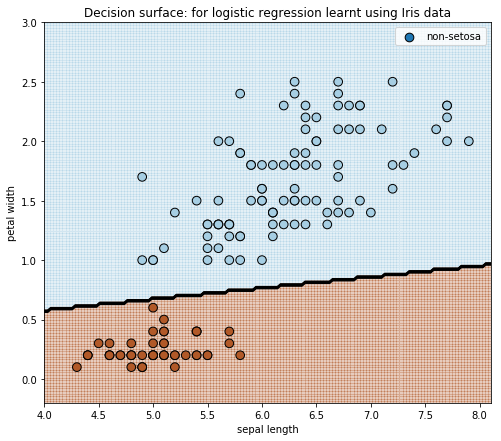

In [15]:
theta=logisticregression(X,ynew,alpha,iterations)
axes = plt.gca()
plt.rcParams["figure.figsize"] = [8,7]
axes.scatter(X['sepal length'], X['petal width'], c = c, zorder=10, cmap =cm.Paired, edgecolors='k', alpha=1, s=75,label='non-setosa')
x_min = X['sepal length'].min()-1
x_max = X['sepal length'].max()+1
y_min = X['petal width'].min()-1
y_max = X['petal width'].max()+1
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
new_df2=pd.DataFrame({'f1':list(XX.ravel()),'f2':list(YY.ravel())})
Z=np.array(test(new_df2,theta))
Z = Z.reshape(XX.shape)
plt.xlim([4,8.1])
plt.ylim([-0.2,3.0])
axes.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.3)
axes.contour(XX, YY, Z, colors=['k'],linestyles=['-'])
axes.set_xlabel("sepal length")
axes.legend()
axes.set_ylabel("petal width")
axes.set_title('Decision surface: for logistic regression learnt using Iris data')

(iv)

In [16]:
clf=LogisticRegression(random_state=0).fit(X,ynew)
acc=accuracy_score(list(clf.predict(X)),ynew)
print('Accuracy using sklearn logistic regression is = ',acc)

Accuracy using sklearn logistic regression is =  1.0


C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5,1,"Decision surface: learnt using sklearn's  LogisticRegression model ")

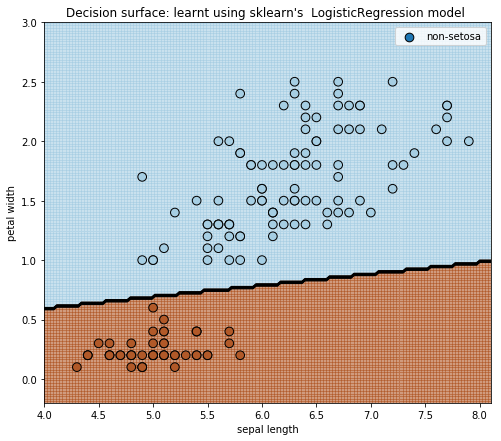

In [17]:
# theta=logisticregression(X,ynew,alpha,iterations)
axes = plt.gca()
plt.rcParams["figure.figsize"] = [8,7]
axes.scatter(X['sepal length'], X['petal width'], c = c, zorder=10, cmap =cm.Paired, edgecolors='k', alpha=1, s=75,label='non-setosa')
x_min = X['sepal length'].min()-1
x_max = X['sepal length'].max()+1
y_min = X['petal width'].min()-1
y_max = X['petal width'].max()+1
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
new_df2=pd.DataFrame({'f1':list(XX.ravel()),'f2':list(YY.ravel())})
Z=clf.predict(new_df2)
Z = Z.reshape(XX.shape)
plt.xlim([4,8.1])
plt.ylim([-0.2,3.0])
axes.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.6)
axes.contour(XX, YY, Z, colors=['k'],linestyles=['-'])
axes.set_xlabel("sepal length")
axes.set_ylabel("petal width")
axes.legend()
# print(clf.coef_)
axes.set_title('Decision surface: learnt using sklearn\'s  LogisticRegression model ')

Both the boundaries were almost similar and the accuracy is same for both the models. Hence both the models were working almost same

# (b)

In [18]:
class neuralnet():
    def __init__(self,X,y,hidden_list,actv_list,cost_func):
        self.data=np.matrix(X)
        self.output=np.matrix(y)
        self.layers=hidden_list
        self.activations=actv_list
        self.loss=cost_func
        self.get_wts(self.layers)
    def get_wts(self,layers):
        np.random.seed(7)
        start=self.data.shape[1]
        self.weights=[]
        self.biases=[]
        for i in range(len(layers)):
#             einit=(6/(start+layers[i]))**0.5
#             t=(np.random.random([start,layers[i]])*2*einit-einit).tolist()
            t=np.random.random([start,layers[i]])
            self.weights.append(t)
#             t2=(np.random.random(layers[i])*2*einit-einit).tolist()
#             t2=np.random.random(layers[i])
            self.biases.append(1)
            start=layers[i]
    def activate(self,function,mat):
        if function.lower()=='sigmoid':
            for i in range(mat.shape[0]):
                for j in range(mat.shape[1]):
                    mat[i,j]=sigmoid(float(mat[i,j]))
        elif function.lower()=='relu':
            return relu(mat)
        elif function.lower()=='linear':
            return mat
        elif function.lower()=='softmax':
            return softmax(mat)
        return mat
    def forward(self,sample): #sample is row 
        z=[]
        output=0
        X=sample
        actvions=[sample]
        for i in range(len(self.activations)):
            output=X*np.matrix(self.weights[i])+self.biases[i]
            z=z+[output]
            output=self.activate(self.activations[i],output)
            actvions=actvions+[output]
            X=output
        return X,z,actvions
    def derivative(self,arr,activateer):
        if activateer.lower()=='sigmoid':
            return sigmoid_derivative(arr)
        elif activateer.lower()=='relu':
            return relu_derivative(arr)
        elif activateer.lower()=='linear':
            return linear_derivative(arr)
        elif activateer.lower()=='softmax':
            return softmax_derivative(arr)
    def makecapdels(self,smalldels,activions):
        capdel=[]
        for i in range(len(self.weights)):
            capdel.append((smalldels[i]*activions[i]).T)
#             print(capdel[-1].shape)
        return capdel
    def backward(self,yhat,z,activions,actual):#yhat is row of output and z is from forward
        smldels=[(yhat-actual).T]
        for i in range(len(self.layers)-2,-1,-1):
#             print('backward',i)
            tdel=np.matrix(self.weights[i+1])*smldels[0]
#             print(tdel.shape)
            tdel2=self.derivative(z[i],self.activations[i]).T
            xx=np.multiply(tdel,tdel2)
#             print(xx.shape)
            smldels=[xx]+smldels
        return self.makecapdels(smldels,activions)
    def gdescent(self,alpha,acc_for):
#         for i in range(epochs):
        for j in range(self.data.shape[0]):
            sample=self.data[j]
#             print(sample.shape)
            ans=self.forward(sample)
#             print(ans[0].shape)
            if acc_for=='regression':
                ans2=self.backward(ans[0],ans[1],ans[2],self.output[0,j])
            elif acc_for.lower() =='classification':
#                 for i in range(ans[0].shape[1]):
#                     if i==np.argmax(ans[0]):
#                         ans[0][0,i]=1
#                     else:
#                         ans[0][0,i]=0
                ans2=self.backward(ans[0],ans[1],ans[2],self.output[j])
            for k in range(len(ans2)):
#                 print(type(self.weights[k]))
                self.weights[k]=(np.matrix(self.weights[k])-ans2[k]*alpha).tolist()
    def predict(self,testX,acc_for):
        X=np.matrix(testX)
#         print(X.shape)
#         y=np.matrix(testy)
        output=0
        for i in range(len(self.activations)):
            output=X*np.matrix(self.weights[i])+self.biases[i]
            output=self.activate(self.activations[i],output)
            X=output
#         print('output shape',X.shape)
        return X
    def acc_reporter(self,a,b,acc_type):
        if acc_type.lower()=='rmse':
            return float(np.square(a-b).mean())**0.5
        elif acc_type.lower()=='mae':
            return float(np.absolute(a-b).mean())
    def fit(self,valX,valy,testX,testy,epochs,alpha,acc_for):
        if acc_for.lower()=='regression':
            return self.fitr(valX,valy,testX,testy,epochs,alpha,acc_for)
        elif acc_for.lower()=='classification':
            return self.fitc(valX,valy,testX,testy,epochs,alpha,acc_for)
    def fitc(self,valX,valy,testX,testy,epochs,alpha,acc_for):
        valy=np.matrix(valy)
        accs=[]
        taccs=[]
        for i in range(epochs):
            self.gdescent(alpha,acc_for)
            output=self.predict(valX,acc_for)
            acc=0
            for j in range(output.shape[0]):
                dd=output[j]
                t=np.argmax(dd)
                t2=np.argmax(valy[j])
                if t==t2:
                    acc+=1
#                 print('printing image labels',t,t2)
            accs+=[(acc/output.shape[0])*100]
            output=self.predict(testX,acc_for)
            acc=0
            for j in range(output.shape[0]):
                dd=output[j]
                t=np.argmax(dd)
                t2=np.argmax(testy[j])
                if t==t2:
                    acc+=1
            taccs+=[(acc/output.shape[0])*100]
        ind=np.argmin(np.array(accs))
        print('Validation accuracy : ',accs[ind])
        print('test accuracy : ',taccs[ind])
    def fitr(self,valX,valy,testX,testy,epochs,alpha,acc_for):
        valrmse=[]
        valmae=[]
        testrmse=[]
        testmae=[]
        for i in range(epochs):
            self.gdescent(alpha,acc_for)
            output=self.predict(valX,acc_for)
            valrmse+=[self.acc_reporter(output,valy,'rmse')]
            valmae+=[self.acc_reporter(output,valy,'mae')]
            output=self.predict(testX,acc_for)
            testrmse+=[self.acc_reporter(output,valy,'rmse')]
            valmae+=[self.acc_reporter(output,valy,'mae')]
            output=self.predict(testX,acc_for)
        ind=np.argmin(np.array(valrmse))
        print('Validation errors : rmse-> ',valrmse[ind],'  mae-> ',valmae[ind])
        print('test errors : rmse-> ',testrmse[ind],'  mae-> ',valmae[ind])
#         print(valrmse)
#         print(testrmse)
#         print('test error = ',testerr[ind])

# (c)

(ii)

In [19]:
realestate=pd.read_csv('Real estate valuation data set.csv')

In [20]:
realestate.head()
realy=realestate['Y house price of unit area']
realX=realestate[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]
trainestX,estX,trainesty,esty=train_test_split(realX,realy,test_size=0.5,random_state=7)
valestX,testestX,valesty,testesty=train_test_split(estX,esty,test_size=0.6,random_state=7)

Converting all dataframes to list of lists

In [21]:
trainestX=trainestX.values.tolist()
trainesty=trainesty.values.tolist()
testestX=testestX.values.tolist()
testesty=testesty.values.tolist()
valestX=valestX.values.tolist()
valesty=valesty.values.tolist()

In [22]:
a=neuralnet(trainestX,trainesty,[10,8,5,1],actv_list=['sigmoid','sigmoid','sigmoid','relu'],cost_func='square_sum')

In [23]:
a.fit(valestX,valesty,testestX,testesty,15,0.01,'regression')

Validation errors : rmse->  15.450642475689822   mae->  11.258478850608867
test errors : rmse->  15.450642475689822   mae->  11.258478850608867


(i)

In [58]:
from mnist import MNIST
mndata = MNIST('samples')
images, labels = mndata.load_training()
testim,testlbl=mndata.load_testing()

For train test split according to given question

In [59]:
testim=testim+images[35000:]
testlbl=testlbl+labels[35000:]
images=images[:35000]
labels=labels[:35000]

In [60]:
mn_y=[]
for i in labels:
    d=[0]*10
    d[i]=1
    mn_y.append(d)
mn_ty=[]
for i in testlbl:
    d=[0]*10
    d[i]=1
    mn_ty.append(d)

In [61]:
valim=testim[:14000]
vallbl=mn_ty[:14000]
testim=testim[14000:]
testlbl=mn_ty[14000:]

In [73]:
a=neuralnet(X=images,y=mn_y,actv_list=['sigmoid','softmax'],hidden_list=[100,10],cost_func='square_sum')

In [74]:
a.fit(acc_for='classification',alpha=0.01,epochs=2,testX=testim,testy=testlbl,valX=valim,valy=vallbl)

Validation accuracy :  86.8
test accuracy :  86.22380952380952
